In [ ]:
import gensim.downloader
model = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
# Select a word vector and see its shape

In [ ]:
word_vector = model['man']
print(word_vector.shape)
print(word_vector)

(50,)
[-0.094386  0.43007  -0.17224  -0.45529   1.6447    0.40335  -0.37263
  0.25071  -0.10588   0.10778  -0.10848   0.15181  -0.65396   0.55054
  0.59591  -0.46278   0.11847   0.64448  -0.70948   0.23947  -0.82905
  1.272     0.033021  0.2935    0.3911   -2.8094   -0.70745   0.4106
  0.3894   -0.2913    2.6124   -0.34576  -0.16832   0.25154   0.31216
  0.31639   0.12539  -0.012646  0.22297  -0.56585  -0.086264  0.62549
 -0.0576    0.29375   0.66005  -0.53115  -0.48233  -0.97925   0.53135
 -0.11725 ]


In [ ]:
print(model['women'])

[-0.95897    0.86149   -0.53064   -0.19908    0.42945    0.93177
  0.067319  -0.21413    0.39488   -0.53561    0.42881   -1.3334
 -0.038192  -0.15667    0.94351   -0.21873   -0.15586    0.084439
 -0.058604  -0.55145   -0.53281    1.2434     0.63441    0.79234
  0.0097936 -1.7124    -0.77291   -1.0024    -0.69472   -0.50487
  3.0517     1.4981    -0.32957   -0.53871   -0.21201   -0.14259
 -0.02706    0.5858    -0.56642   -0.55984   -0.60905   -0.57062
  1.3338     0.67097    1.0643    -0.4181    -0.44273   -1.0158
 -0.35795   -0.31111  ]


In [ ]:
pairs = [
         ('car', 'van'),
         ('car', 'truck'),
         ('car', 'bicycle'),
         ('car', 'vehicle')
]

In [ ]:
# Find the similarity between pairs

In [ ]:
for v1, v2 in pairs:
  print(f"{v1}:{v2} -> {model.similarity(v1, v2)}")

car:van -> 0.4927815794944763
car:truck -> 0.9208585619926453
car:bicycle -> 0.7560276389122009
car:vehicle -> 0.8833684325218201


In [ ]:
# Find the top5 similar words to 'code'

In [ ]:
for ele in model.most_similar('code', topn=5):
  print(ele)

('codes', 0.909034788608551)
('defines', 0.7590715289115906)
('applies', 0.7557394504547119)
('system', 0.7534014582633972)
('standard', 0.7385658621788025)


In [ ]:
def analogy(x1, x2, y1):
  result = model.most_similar(positive=[x2, y1], negative=[x1])
  return result[0][0]

In [ ]:
analogy('man', 'king', 'woman')

'queen'

In [ ]:
analogy('man', 'his', 'woman')

'her'

In [ ]:
analogy('tall', 'tallest', 'small')

'largest'

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
def display_pca_scatterplot(model, words, sample=0):
  word_vectors = np.array([model[word] for word in words])
  two_dim = PCA().fit_transform(word_vectors)[:, :2]

  plt.figure(figsize=(6, 6))
  plt.scatter(two_dim[:, 0], two_dim[:, 1], edgecolors='k', c='r')

  for word, (x, y) in zip(words, two_dim):
    plt.text(x+0.05, y+0.05, word)

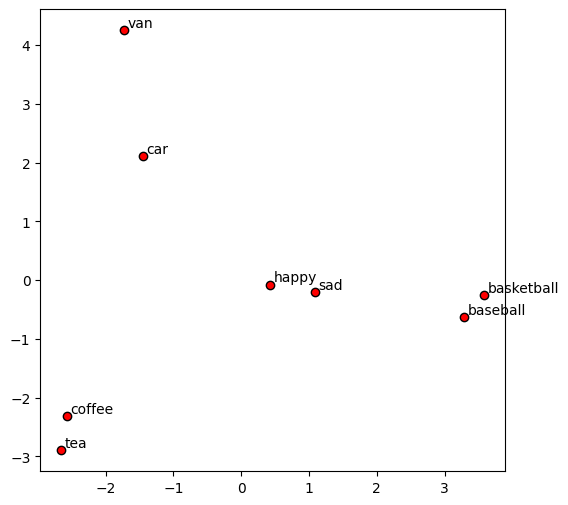

In [ ]:
display_pca_scatterplot(model,
                        ['coffee', 'tea',
                         'happy', 'sad',
                         'car', 'van',
                         'basketball', 'baseball'])